# 동시구매 상품분석 실습


## **1. 환경 설정**



### 1.1 분석에 필요한 library 설치,호출 및 google drive 연결


In [5]:
# 연관성분석(추천)  패키지 다운로드 및 설치
!pip install mlxtend --upgrade

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
## 1. 분석에 사용할 패키지 로딩
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt # 날짜를 다루기 위한 패키지

from mlxtend.preprocessing import TransactionEncoder # 구매 데이터를 연관성 분석을 위한 메트릭스 형태로 변환
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth # fpgrowth 는 mlxtend version: 0.20.0 이상에서 지원


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# 구글드라이브에 있는 데이터셋 연결을 위한 구글드라이브 세팅
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2. 데이터 불러오기 및 확인**

### 2.1 데이터 불러오기 및 확인

In [8]:
# 파일의 위치는 내 구글드라이브 연결후 실습 파일을 선택하고 "..." 클릭하여 "경로복사"를 하여 붙여 넣으시면 됩니다.
data = pd.read_csv('/content/drive/MyDrive/[러닝스푼즈] CRM 프로젝트/[러닝스푼즈] CRM 머신러닝 프로젝트_2기/4강_동시구매상품분석/data.csv', encoding= 'unicode_escape')

data.head() # 처음 5개 데이터 확인

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
data.tail() # 마지막 5개 데이터 확인

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [10]:
# 각 컬럼(변수)의 유형 확인
data.info()

## InvoiceDate 값이 문자형으로 되어있는 부분 확인
## 이후 문자형 -> 날짜형으로 변환 필요

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
# 연속형 변수의 분포 확인
data.describe()

## 여기서 확인하고 넘어갈 부분
## 1. 이상치, 음수 및 최대값 확인
## 2. 평균과 50%(중앙값)의 차이 확인
## 3. 이상75% 와 max 값의 차이가 std 의몇배가 되는지 확인

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### 2.2 데이터형변환

In [12]:
# 데이터형변환 : 날짜 계산을 위해 InvoiceDate의 Data type을 object type -> datetime64 로 변환
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## **3. Null값 확인 및 처리**

### 3.1 Null 값 확인

In [14]:
# 3.1 Null 값이 있는 전체 case 수 확인
print(data.isnull().sum().sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


136534


In [15]:
# Null 값이 있는 변수 확인 (null 값이 있는 컬럼이 2개 존재)
data.isnull().sum()

## Description 과 CustomerID에 Null 값이 있는것 확인

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
# 혹시 "" 공란으로 비어 있는 값이 있나 확인
data[data['Description']=='']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


#### CustomerID 가 Null 값인 거래의 구매 상품수량 분포 확인해보기

In [17]:
# CustomerID Null 값인과 정상 거래 트랜잭션 별 상품수 확인
data_null= data[data.CustomerID.isnull()].groupby('InvoiceNo')['StockCode'].count()
print(data_null)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo
536414       1
536544     527
536545       1
536546       1
536547       1
          ... 
C578097      7
C579757      1
C579907      1
C580604      1
C580605      1
Name: StockCode, Length: 3710, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([3.30e+03, 2.35e+02, 8.30e+01, 3.40e+01, 3.00e+01, 2.00e+01,
        7.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([1.0000e+00, 1.1230e+02, 2.2360e+02, 3.3490e+02, 4.4620e+02,
        5.5750e+02, 6.6880e+02, 7.8010e+02, 8.9140e+02, 1.0027e+03,
        1.1140e+03]),
 <BarContainer object of 10 artists>)

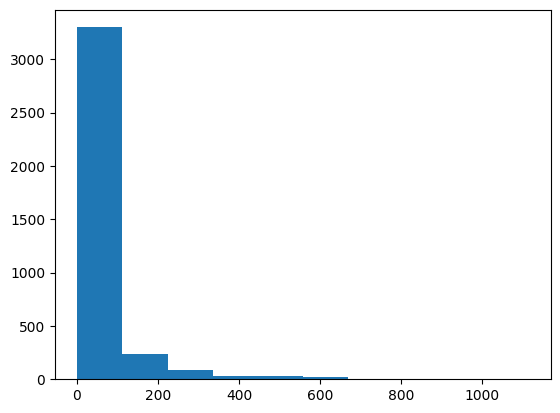

In [18]:
# CustomerID Null 값의 구매상품 수량 분포 시각화확인
plt.hist(data_null)

#### CustomerID 가 Null 이 아닌(정상인) 거래의 구매 상품수량 분포 확인해보기


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([2.0858e+04, 1.1410e+03, 1.4500e+02, 2.5000e+01, 6.0000e+00,
        3.0000e+00, 5.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  1. ,  55.1, 109.2, 163.3, 217.4, 271.5, 325.6, 379.7, 433.8,
        487.9, 542. ]),
 <BarContainer object of 10 artists>)

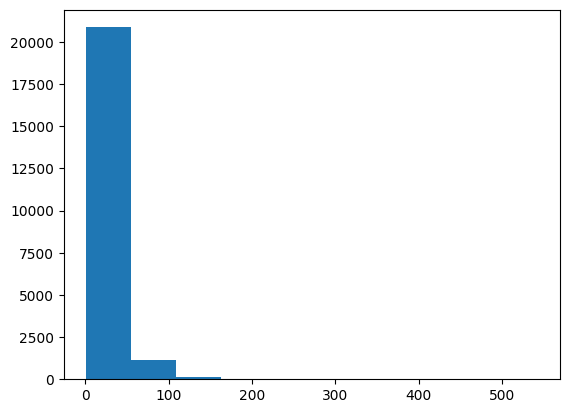

In [19]:
data_notnull = data[data.CustomerID.notnull()].groupby('InvoiceNo')['StockCode'].count()
plt.hist(data_notnull)

### 3.2 Null 값 처리 (삭제) 및 확인

In [20]:
# Description NA 값 확인 및 처리
## 상품 정보를 확인할 수 있는 Description이 Null 인 것만 분석에서 제외
## 연관성 분석의 기준은 CustomerID 기준이 아니라 InvoiceNo 기준이라 CustomerID 값이 Null 인것도 사용함
data_na_treat = data[data.Description.notnull()]
data_na_treat.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,540455.000000,540455,540455.000000,406829.000000
mean,9.603129,2011-07-04 16:20:42.947035392,4.623519,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:49:00,1.250000,13953.000000
50%,3.000000,2011-07-20 11:38:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:49:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.007598,NaN,96.889628,1713.600303


In [21]:
# Description의 Null 값이 모두 빠졌는지 확인
data_na_treat.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

## **4. 데이터 탐색 및 이상치 제거**

### 4.1 이상치 확인 및 제거

#### 음수값 확인 (환불 case)

In [22]:
# Quantity 이상치 case 확인
data_na_treat[(data_na_treat.Quantity == 80995) | (data_na_treat.Quantity == -80995)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [23]:
# 음수 -> 환불 확인
data_na_treat[(data_na_treat.Quantity <= 0) & (data_na_treat.InvoiceNo.astype(str).str[0] == 'C')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


#### 음수값 제거

In [24]:
# 환불 데이터는 InvoiceNo 앞에 "C"로 표시 &  Quantity 값이 음수(-)
data_pur = data_na_treat[data_na_treat.InvoiceNo.astype(str).str[0] != 'C']
data_pur.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,531167.000000,531167,531167.000000,397924.000000
mean,10.293623,2011-07-04 19:55:25.199757824,3.858153,15294.315171
min,-9600.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:45:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:54:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,159.301358,NaN,41.814651,1713.169877


#### 트랜젝션당 거래 상품수

In [25]:
# 분석 단위 확인을 위한 트랜잭션 당 구매 상품수 확인
data_pur.groupby('InvoiceNo')['StockCode'].count().describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    20610.000000
mean        25.772295
std         47.001377
min          1.000000
25%          6.000000
50%         15.000000
75%         29.000000
max       1114.000000
Name: StockCode, dtype: float64

In [26]:
#  유저별로 얼마나 많이 주문을 했나 ? 유저별 거래수
data_pur.groupby('CustomerID')['InvoiceNo'].nunique().describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    4339.000000
mean        4.271952
std         7.705493
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       210.000000
Name: InvoiceNo, dtype: float64

In [27]:
# 유저별로 하루에 거래한 횟수
data_pur['dt'] = pd.to_datetime(data_pur['InvoiceDate']).dt.date
data_pur.groupby(['CustomerID','dt'])['InvoiceNo'].nunique().describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-27-40c64221e045>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pur['dt'] = pd.to_datetime(data_pur['InvoiceDate']).dt.date


count    16766.000000
mean         1.105571
std          0.444950
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         24.000000
Name: InvoiceNo, dtype: float64

In [28]:
# 유저별로 확인
data_pur.groupby('CustomerID')['StockCode'].nunique().describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    4339.000000
mean       61.489283
std        85.363900
min         1.000000
25%        16.000000
50%        35.000000
75%        77.000000
max      1787.000000
Name: StockCode, dtype: float64

In [29]:
# InvoiceNo 단위로도 충분함 !!
data_invoice_cnt = data_pur.groupby('InvoiceNo').agg(
    n = ('StockCode','count'))
data_invoice_cnt.columns = ['n']
data_invoice_cnt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,n
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1
...,...
581586,4
581587,15
A563185,1


In [30]:
data_invoice_cnt.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,n
count,20610.000000
mean,25.772295
std,47.001377
min,1.000000
25%,6.000000
50%,15.000000
75%,29.000000
max,1114.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'whiskers': [<matplotlib.lines.Line2D at 0x7b1fc381dea0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b1fc381f8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b1fc381f220>],
 'medians': [<matplotlib.lines.Line2D at 0x7b1fc381fe20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b1fc3858100>],
 'means': []}

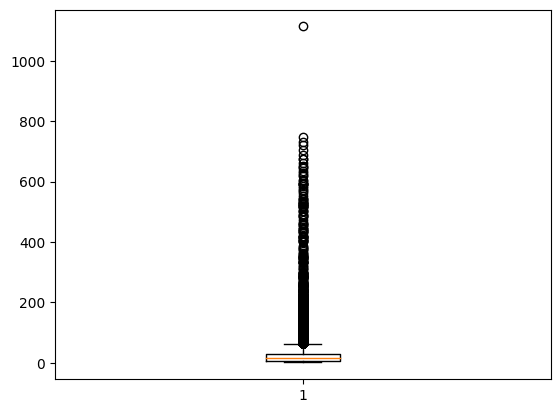

In [31]:
# 이상치 제거  (한번에 너무 많은 상품을 구매하는 InvoiceNo 제거 )
# 이상치 기준 탐색
fig, ax = plt.subplots()
ax.boxplot(data_invoice_cnt['n'])
#ax.set_ylim (0,100)

In [32]:
# 특정 분위수값  확인
np.percentile(data_invoice_cnt['n'], 95)

## data_invoice_cnt['n'].quantile(q=0.99)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


77.0

In [33]:
data_invoice_cnt.mean()[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


25.772295002426006

In [34]:
print(f"mean: {data_invoice_cnt.mean()[0]}, sd: {data_invoice_cnt.std()[0]}, \ntwo_sigma(상위 2.2%): {data_invoice_cnt.mean()[0]+2*data_invoice_cnt.std()[0]}, \nthree_sigma (상위0.1%): {data_invoice_cnt.mean()[0]+3*data_invoice_cnt.std()[0]}")

mean: 25.772295002426006, sd: 47.001376872826825, 
two_sigma(상위 2.2%): 119.77504874807966, 
three_sigma (상위0.1%): 166.77642562090648


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### 트랜젝션당 거래 상품수 이상치제거

In [35]:
outlier_treat = data_invoice_cnt[(data_invoice_cnt.n >= 2)  & (data_invoice_cnt.n <= 120)]
pur_outlier_treat = pd.merge(outlier_treat, data_pur, how ='inner', on = 'InvoiceNo' )
pur_outlier_treat

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,n,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,dt
0,536365,7,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,7,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,7,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,7,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,7,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
395212,581587,15,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09
395213,581587,15,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09
395214,581587,15,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
395215,581587,15,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09


### 4.2 데이터 탐색

#### 각 국가별 주문건수

In [36]:
# 각 국가별 주문건수
invoce_product_cnt = pur_outlier_treat.groupby(['Country','InvoiceNo']).size()
invoce_product_cnt.groupby('Country').count().sort_values(ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Country
United Kingdom          16011
Germany                   432
France                    374
EIRE                      267
Belgium                    98
Spain                      86
Netherlands                84
Portugal                   48
Australia                  47
Switzerland                46
Finland                    40
Norway                     32
Italy                      32
Sweden                     30
Channel Islands            23
Poland                     18
Denmark                    18
Austria                    17
Japan                      15
Unspecified                13
Cyprus                     12
Israel                      7
Iceland                     7
Hong Kong                   7
Singapore                   6
USA                         5
Greece                      5
Malta                       4
Canada                      4
European Community          3
Czech Republic              2
Bahrain                     2
Lithuania                   2
Un

#### 각 국가별 가장 많은 거래에 포함된 상품 Top 5 비교  (직접해보기)

In [37]:
# pandas row 수를 모두 보여주기 옵션 (단, 느려질 수 있음)
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# 각 국가별 가장 많은 거래에 포함된 상품 Top 5 비교
## 1.국가별, 주문번호별, 상품명 만 있는 데이터 만들기
## 2. 국가별, 상품명 별로 groupby 요약하여 count 생성
## 3. 국가별, count 별로 rank 를 생성
## 4. rank 가 5위 안인것만 나라별, rank 별로 정렬하여 보기

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
## 1.국가별, 주문번호별, 상품명 만 있는 데이터 만들기
for_top_5_product = pur_outlier_treat[['Country','InvoiceNo','Description']]
for_top_5_product

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: 

In [ ]:
## 2. 국가별, 상품명 별로 groupby 요약하여 count 생성
temp_for_top_5_product = for_top_5_product.groupby(['Country','Description']).agg(
    InvoiceCNT = ('InvoiceNo', 'count')
)
temp_for_top_5_product.reset_index()

In [ ]:
## 2. 국가별, 상품명 별로 groupby 요약하여 count 생성
for_top_5_product.groupby(['Country','Description']).count().reset_index()

In [ ]:
# 각 국가별 가장 많은 거래에 포함된 상품 Top 5 비교
## 1.국가별, 주문번호별, 상품명 만 있는 데이터 만들기
for_top_5_product = pur_outlier_treat[['Country','InvoiceNo','Description']]
## 2. 국가별, 상품명 별로 groupby 요약하여 count 생성
temp_for_top_5_product = for_top_5_product.groupby(['Country','Description']).count().reset_index()
## 3. 국가별, count 별로 rank 를 생성
temp_for_top_5_product['rank'] = temp_for_top_5_product.groupby(['Country'])['InvoiceNo'].rank(method = 'min',ascending = False)
## 4. rank 가 5위 안인것만 나라별, rank 별로 정렬하여 보기
## 특정 나라 지정
temp_for_top_5_product[(temp_for_top_5_product['Country'] == 'United Kingdom') & (temp_for_top_5_product['rank']<= 5)]

In [ ]:
## 4. rank 가 5위 안인것만 나라별, rank 별로 정렬하여 보기
temp_for_top_5_product[temp_for_top_5_product['rank']<= 5].sort_values(by=['Country','rank'], ascending =[False, True])

In [ ]:
## 5. 가장 많은 주문을 한 나라가 먼저 나오도록 정렬 하기 위해 나라변 주문 건수 생성
country_order_count = invoce_product_cnt.groupby('Country').count().sort_values(ascending = False).reset_index()
country_order_count.columns = ['Country','cnt']
country_order_count.head()

In [ ]:
## 6. 나라별 주문건수 합계 데이터와 상품별 rank 데이터 합치기
for_top_5_product_by_country = pd.merge(temp_for_top_5_product, country_order_count, how ='inner', on ='Country')
## 7. 나라별 주문건수, 상품별 rank 기준 정렬
for_top_5_product_by_country[for_top_5_product_by_country['rank'] <= 10].sort_values(by=['cnt','rank'], ascending = [False, True])

In [40]:
pd.reset_option('display.max_rows')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 5.데이터 변환 및 데이터 탐색

### 5.1 연관성 분석용 matrix 생성

In [41]:
pur_by_tran = pur_outlier_treat[['InvoiceNo', 'Description']]

def toList(x):
    return list(set(x))

purchase_list = pur_by_tran.groupby('InvoiceNo')['Description'].apply(lambda x: toList(x)).reset_index()
purchase_list = list(purchase_list.Description)
purchase_list[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['GLASS STAR FROSTED T-LIGHT HOLDER',
  'SET 7 BABUSHKA NESTING BOXES',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'WHITE METAL LANTERN',
  'CREAM CUPID HEARTS COAT HANGER',
  'WHITE HANGING HEART T-LIGHT HOLDER'],
 ['HAND WARMER RED POLKA DOT', 'HAND WARMER UNION JACK'],
 ['BOX OF 6 ASSORTED COLOUR TEASPOONS',
  "POPPY'S PLAYHOUSE KITCHEN",
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  "POPPY'S PLAYHOUSE BEDROOM ",
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'RECIPE BOX WITH METAL HEART',
  'IVORY KNITTED MUG COSY ',
  'ASSORTED COLOUR BIRD ORNAMENT',
  'HOME BUILDING BLOCK WORD',
  'DOORMAT NEW ENGLAND',
  'LOVE BUILDING BLOCK WORD',
  'BOX OF VINTAGE JIGSAW BLOCKS '],
 ['YELLOW COAT RACK PARIS FASHION',
  'BLUE COAT RACK PARIS FASHION',
  'JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION'],
 ['ALARM CLOCK BAKELIKE RED ',
  'LUNCH BOX I LOVE LONDON',
  'CIRCUS PARADE LUNCH BOX ',
  'VINTAGE SEASIDE JIGSAW PUZZLES',
  'STARS GIFT TAPE ',
  'POSTAGE',

In [42]:
te = TransactionEncoder()
te_ary = te.fit(purchase_list).transform(purchase_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17798,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17799,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17800,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
17801,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 5.2 EDA #####


In [ ]:
# 가장 많이 구매항 상품 top 10
fig, ax = plt.subplots()
pur_outlier_treat['Description'].value_counts().head(10).plot(ax=ax, kind='bar')

In [ ]:
pur_outlier_treat['Description'].value_counts(normalize =True)#.plot(ax=ax, kind='bar')

## 6.모델링


### 6.1연관성 모델 생성

#### 전체 데이터 적용& APRIORI 알고리즘 적용

In [43]:
# 연관성 분석 알고리즘 적용
freq_itemsets1 = fpgrowth(df, min_support = 0.01, max_len = 1, use_colnames = True)
#freq_itemsets1 = apriori(df, min_support = 0.01, max_len = 3, use_colnames = True) # 메모리를 많이 소모해서 알고리즘 수정
## 옵션 최소 1% 이상 판매된 상품, 최대 길이 3개 까지 상품 조합을 했을 때 까지 고려, items 이름을 번호가 아닌 이름으로 표시

freq_itemsets1
## 1101개 상품 조합 (Rule) 생성

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.109701,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.020558,(RED WOOLLY HOTTIE WHITE HEART.)
2,0.020446,(KNITTED UNION FLAG HOT WATER BOTTLE)
3,0.016626,(SET 7 BABUSHKA NESTING BOXES)
4,0.013649,(WHITE METAL LANTERN)
...,...,...
1097,0.010448,"(LUNCH BAG BLACK SKULL., LUNCH BAG VINTAGE DO..."
1098,0.012077,"(LUNCH BAG VINTAGE DOILY , JUMBO BAG VINTAGE D..."
1099,0.011627,"(LOVE HOT WATER BOTTLE, HOT WATER BOTTLE KEEP ..."
1100,0.013706,"(HOT WATER BOTTLE KEEP CALM, CHOCOLATE HOT WAT..."


In [44]:
# 조건 변경 (최소 지지도 0.5% 이상, 상품 조하 5개 까지)
freq_itemsets2 = fpgrowth(df, min_support = 0.005, max_len = 5, use_colnames = True) # 메모리를 많이 소모해서 알고리즘 수정
freq_itemsets2
## 5134개 Rule 조합

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.109701,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.020558,(RED WOOLLY HOTTIE WHITE HEART.)
2,0.020446,(KNITTED UNION FLAG HOT WATER BOTTLE)
3,0.016626,(SET 7 BABUSHKA NESTING BOXES)
4,0.013649,(WHITE METAL LANTERN)
...,...,...
5130,0.005111,"(VINTAGE DOILY JUMBO BAG RED , JUMBO BAG 50'S ..."
5131,0.005055,"(LUNCH BAG VINTAGE DOILY , LUNCH BAG PAISLEY P..."
5132,0.007246,"(JUMBO BAG PAISLEY PARK, LUNCH BAG PAISLEY PAR..."
5133,0.005224,"(JUMBO BAG PAISLEY PARK, JUMBO BAG 50'S CHRIST..."


In [ ]:
# 조건 변경 (최소 지지도 0.5% 이상, 상품 조하 5개 까지)
#freq_itemsets2 = apriori(df, min_support = 0.005, max_len = 5, use_colnames = True)
#freq_itemsets2
## 5134개 Rule 조합

### 6.2 생성된 연관성 규칙 확인  #####

In [45]:
## antecedents 선형변수 consequents 후행변수 -> 앞에꺼를 샀을 경우에 뒤에꺼를 살 확률
## 보통 리프트 중심으로 체크
rules_conf_20 = association_rules(freq_itemsets1, metric='confidence', min_threshold=0.5)
rules_conf_20.sort_values(['lift'],ascending = False).head(10)
# rules = association_rules(freq_itemsets1, metric='lift', min_threshold=1)
# rules.sort_values(['lift'], ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
398,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN ),0.012077,0.014492,0.010841,0.897674,61.943014,0.010666,9.631101,0.995883
399,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE PINK),0.014492,0.012077,0.010841,0.748062,61.943014,0.010666,3.921296,0.998324
392,(REGENCY MILK JUG PINK ),(REGENCY SUGAR BOWL GREEN),0.015278,0.014773,0.011627,0.761029,51.515615,0.011402,4.122797,0.995803
393,(REGENCY SUGAR BOWL GREEN),(REGENCY MILK JUG PINK ),0.014773,0.015278,0.011627,0.787072,51.515615,0.011402,4.624675,0.995292
269,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",(POPPY'S PLAYHOUSE LIVINGROOM ),0.014099,0.014548,0.010392,0.737052,50.663062,0.010186,3.747703,0.994280
270,(POPPY'S PLAYHOUSE LIVINGROOM ),"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",0.014548,0.014099,0.010392,0.714286,50.663062,0.010186,3.450654,0.994733
400,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE ROSES ),0.012077,0.017750,0.010616,0.879070,49.525567,0.010402,8.122453,0.991786
401,(REGENCY TEA PLATE ROSES ),(REGENCY TEA PLATE PINK),0.017750,0.012077,0.010616,0.598101,49.525567,0.010402,2.458140,0.997514
267,"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",(POPPY'S PLAYHOUSE BEDROOM ),0.011852,0.018368,0.010392,0.876777,47.734757,0.010174,7.966324,0.990794
272,(POPPY'S PLAYHOUSE BEDROOM ),"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",0.018368,0.011852,0.010392,0.565749,47.734757,0.010174,2.275524,0.997370


In [46]:
rules.sort_values(['confidence'], ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'rules' is not defined

### 6.3 결과파일로 저장

In [47]:
# 결과 csv로 저장
df_csv = pd.DataFrame(rules_conf_20)
df_csv.to_csv('/content/drive/MyDrive/[러닝스푼즈] CRM 프로젝트/[러닝스푼즈] CRM 머신러닝 프로젝트 (공유ver.)/4주차/association_rule_result.csv',index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/[러닝스푼즈] CRM 프로젝트/[러닝스푼즈] CRM 머신러닝 프로젝트 (공유ver.)/4주차'

## 7.심화적용 (직접해보기)

#### 가장 많은 구매가 있는 두 국가  United Kingdom,Germany 를 뽑고, 각 나라별 rule 을 만들어 rule 비교해보기  